In [1]:
import tensorflow as tf
from tensorflow.contrib import slim
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
import matplotlib.pyplot as plt
from util import plot

## Setting; parameter & data

In [2]:
mb_size = 128
X_dim = 28 * 28
z_dim = 100
hidden_dim = 100
D_out_dim = 1

mnist = input_data.read_data_sets('./data/MNIST', one_hot=True)

save_image_path = 'vanilla_gan'

if not os.path.exists('out/{}/'.format(save_image_path)):
    os.makedirs('out/{}/'.format(save_image_path))

Extracting ./data/MNIST/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/t10k-labels-idx1-ubyte.gz


## Model

In [3]:
def sample_z(batch_size, n):
    return np.random.uniform(-1., 1., size=[batch_size, n])


def generator(z):
    with tf.variable_scope('G'):
        G_hidden = slim.fully_connected(z, hidden_dim, activation_fn=tf.nn.relu)
        G_prob = slim.fully_connected(G_hidden, X_dim, activation_fn=tf.nn.sigmoid)
    return G_prob


def discriminator(x, reuse=False):
    with tf.variable_scope('D', reuse=reuse):
        D_hidden = slim.fully_connected(x, hidden_dim, activation_fn=tf.nn.relu)
        D_prob = slim.fully_connected(D_hidden, D_out_dim, activation_fn=tf.nn.sigmoid)
    return D_prob


X = tf.placeholder(tf.float32, shape=[None, X_dim])
z = tf.placeholder(tf.float32, shape=[None, z_dim])

G_sample = generator(z)
D_real = discriminator(X)
D_fake = discriminator(G_sample, reuse=True)

## Loss  & Optimizer

In [4]:
D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

theta_G = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='G')
theta_D = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='D')

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)


## Training

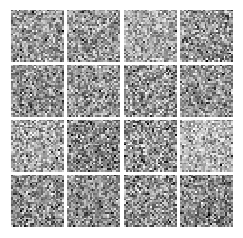

Iter: 0
D loss: 1.17
G_loss: 2.683



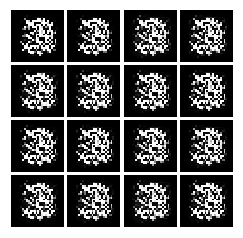

Iter: 1000
D loss: 0.01356
G_loss: 8.199



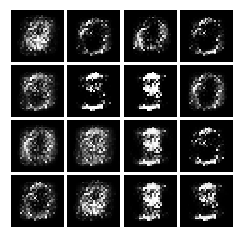

Iter: 2000
D loss: 0.1078
G_loss: 4.78



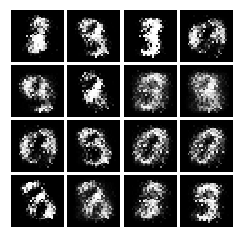

Iter: 3000
D loss: 0.08678
G_loss: 5.912



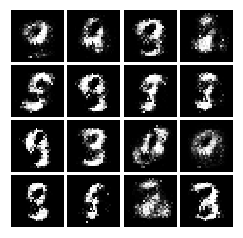

Iter: 4000
D loss: 0.2203
G_loss: 4.917



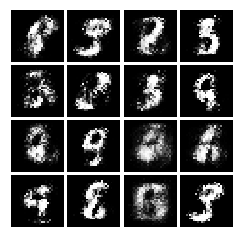

Iter: 5000
D loss: 0.3856
G_loss: 3.726



/home/shkim/anaconda3/envs/tf1.1/lib/python3.6/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/shkim/anaconda3/envs/tf1.1/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


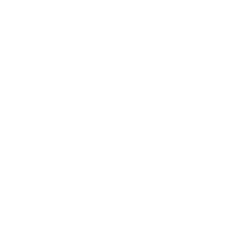

Iter: 6000
D loss: nan
G_loss: nan



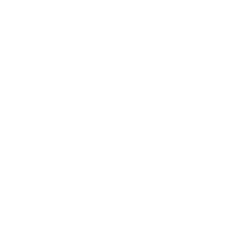

Iter: 7000
D loss: nan
G_loss: nan



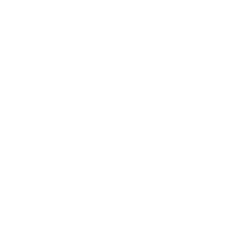

Iter: 8000
D loss: nan
G_loss: nan



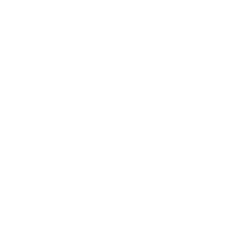

Iter: 9000
D loss: nan
G_loss: nan



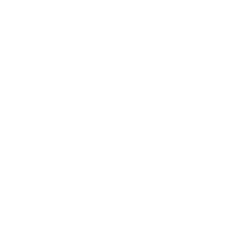

Iter: 10000
D loss: nan
G_loss: nan



In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())


for it in range(10001):
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={z: sample_z(16, z_dim)})

        fig = plot(samples)
        plt.savefig('out/{}/{}.png'.format(save_image_path, str(it//1000).zfill(3)), bbox_inches='tight')
        plt.show()
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, z: sample_z(mb_size, z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={z: sample_z(mb_size, z_dim)})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()